# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Set units for search
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | midvagur
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | ula
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | aguililla
Processing Record 10 of Set 1 | kourou
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | weno
Processing Record 13 of Set 1 | sydney mines
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | kajaani
Processing Record 16 of Set 1 | marsh harbour
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | keelung
Processing Record 20 of Set 1 | dire
Processing Record 21 of Set 1 | katabu
Processing Record 22 of Set 1 | tlahualilo de zaragoza
Process

Processing Record 39 of Set 4 | alotau
City not found. Skipping...
Processing Record 40 of Set 4 | torit
Processing Record 41 of Set 4 | kavalerovo
Processing Record 42 of Set 4 | kurchum
Processing Record 43 of Set 4 | o rosal
Processing Record 44 of Set 4 | la'ie
Processing Record 45 of Set 4 | kokuy
Processing Record 46 of Set 4 | uturoa
Processing Record 47 of Set 4 | kirensk
Processing Record 48 of Set 4 | minsk mazowiecki
Processing Record 49 of Set 4 | namtsy
Processing Record 0 of Set 5 | chaoyang
Processing Record 1 of Set 5 | middelburg
Processing Record 2 of Set 5 | setubal
Processing Record 3 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 5 | prince edward
Processing Record 5 of Set 5 | lihue
Processing Record 6 of Set 5 | kasongo-lunda
Processing Record 7 of Set 5 | northam
Processing Record 8 of Set 5 | gidam
Processing Record 9 of Set 5 | kapuskasing
Processing Record 10 of Set 5 | sur
Processing Record 11 of Set 5 | solwezi
Processin

Processing Record 31 of Set 8 | seogwipo
City not found. Skipping...
Processing Record 32 of Set 8 | sao felix do xingu
Processing Record 33 of Set 8 | nichinan
Processing Record 34 of Set 8 | deschutes river woods
Processing Record 35 of Set 8 | makoua
Processing Record 36 of Set 8 | shiyan
Processing Record 37 of Set 8 | port alfred
Processing Record 38 of Set 8 | arawa
Processing Record 39 of Set 8 | forster
Processing Record 40 of Set 8 | leticia
Processing Record 41 of Set 8 | gagliano del capo
Processing Record 42 of Set 8 | koneurgench
City not found. Skipping...
Processing Record 43 of Set 8 | masina
Processing Record 44 of Set 8 | songyuan
Processing Record 45 of Set 8 | vadso
Processing Record 46 of Set 8 | soderhamn
Processing Record 47 of Set 8 | uzgen
Processing Record 48 of Set 8 | hermanus
Processing Record 49 of Set 8 | santiago de cao
Processing Record 0 of Set 9 | pangody
Processing Record 1 of Set 9 | concepcion del oro
Processing Record 2 of Set 9 | ponta delgada
Pr

Processing Record 19 of Set 12 | hayma'
City not found. Skipping...
Processing Record 20 of Set 12 | yamethin
Processing Record 21 of Set 12 | iron river
Processing Record 22 of Set 12 | sofifi
City not found. Skipping...
Processing Record 23 of Set 12 | pekan
Processing Record 24 of Set 12 | bejubang dua
City not found. Skipping...
Processing Record 25 of Set 12 | katrineholm
Processing Record 26 of Set 12 | khandud
Processing Record 27 of Set 12 | namibe
Processing Record 28 of Set 12 | gereida
Processing Record 29 of Set 12 | mabaruma
Processing Record 30 of Set 12 | natchez
Processing Record 31 of Set 12 | wanzleben
Processing Record 32 of Set 12 | roccella ionica
Processing Record 33 of Set 12 | el alto
Processing Record 34 of Set 12 | grand falls-windsor
Processing Record 35 of Set 12 | belen
Processing Record 36 of Set 12 | bridgewater
Processing Record 37 of Set 12 | pitea
Processing Record 38 of Set 12 | guilin
Processing Record 39 of Set 12 | lubang
Processing Record 40 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,midvagur,62.0511,-7.1939,7.46,93,100,9.26,FO,1704426351
1,atafu village,-8.5421,-172.5159,29.23,65,96,4.92,TK,1704426300
2,tiksi,71.6872,128.8694,-35.45,100,73,1.51,RU,1704426339
3,ula,22.7225,88.5556,17.99,72,0,2.57,IN,1704426620
4,thompson,55.7435,-97.8558,-22.91,84,0,3.60,CA,1704426317


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("outputs/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("outputs/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,midvagur,62.0511,-7.1939,7.46,93,100,9.26,FO,1704426351
1,atafu village,-8.5421,-172.5159,29.23,65,96,4.92,TK,1704426300
2,tiksi,71.6872,128.8694,-35.45,100,73,1.51,RU,1704426339
3,ula,22.7225,88.5556,17.99,72,0,2.57,IN,1704426620
4,thompson,55.7435,-97.8558,-22.91,84,0,3.60,CA,1704426317


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

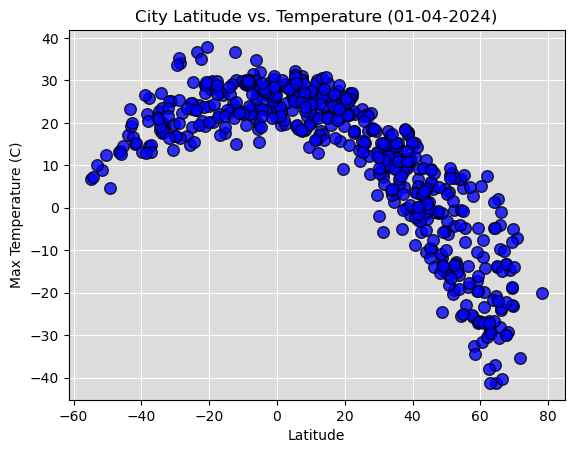

In [8]:
# Build scatter plot for latitude vs. temperature
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, color="blue", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("outputs/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

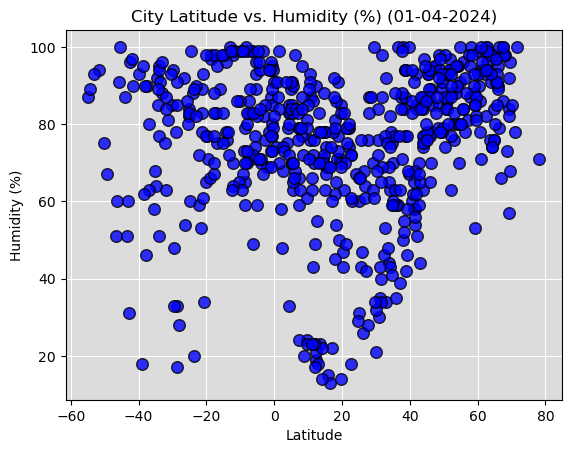

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, color="blue", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("outputs/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

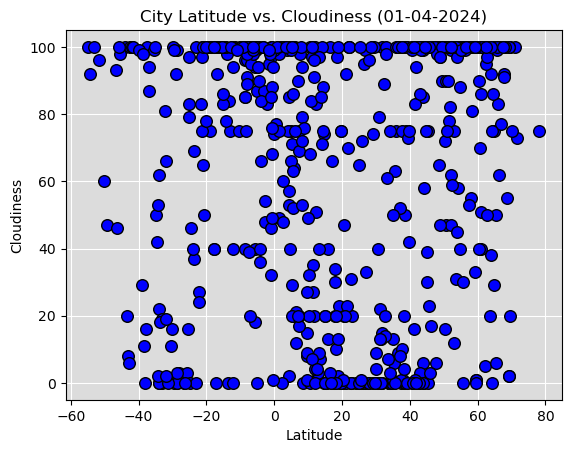

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("outputs/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

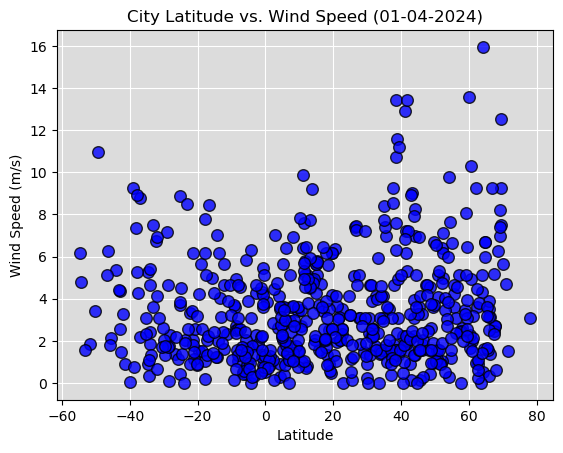

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, color="blue", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 


# Save the figure
plt.savefig("outputs/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def latitude_regress(df, x_Col, y_Col):
    
    # Perform the linear regression on the data
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], df[y_Col])
    
    # Set up x and y axes data points
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    # Create scatterplot
    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, color="blue", edgecolors="k", alpha=.8, s=[70], zorder=3)
    plt.grid(True, color='gainsboro', linestyle='solid', zorder=1) 

    # Add the best fit line
    df_axes.plot(regr_line_x, regr_line_y, 'r-', zorder=4)

    # Output linear regression info
    print(" ")
    print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
          .format(regr_slope, regr_intercept))
    print(" ")
    print("The r-squared correlation coefficient for this line is {:.2f}".format(regr_r_val))
                  
    # Return the axes object for the plots, in case any changes need to be made
    return df_axes

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,midvagur,62.0511,-7.1939,7.46,93,100,9.26,FO,1704426351
2,tiksi,71.6872,128.8694,-35.45,100,73,1.51,RU,1704426339
3,ula,22.7225,88.5556,17.99,72,0,2.57,IN,1704426620
4,thompson,55.7435,-97.8558,-22.91,84,0,3.60,CA,1704426317
8,aguililla,18.7333,-102.7333,15.61,77,2,2.49,MX,1704426621


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,29.23,65,96,4.92,TK,1704426300
5,saint-pierre,-21.3393,55.4781,28.99,89,100,2.06,RE,1704426620
6,bredasdorp,-34.5322,20.0403,18.19,92,42,0.88,ZA,1704426306
7,ushuaia,-54.8000,-68.3000,6.81,87,100,6.17,AR,1704426294
10,port-aux-francais,-49.3500,70.2167,4.66,67,47,10.95,TF,1704426291


###  Temperature vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=-0.78x+33.96
 
The r-squared correlation coefficient for this line is -0.89


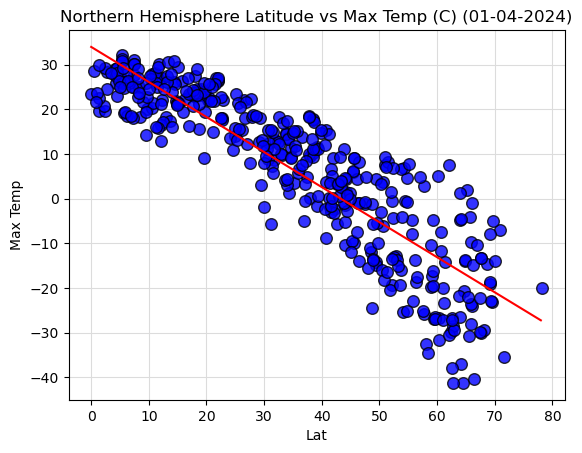

In [15]:
# Linear regression on Northern Hemisphere
northern_regress = latitude_regress(northern_hemi_df, "Lat", "Max Temp")
plt.title(f"Northern Hemisphere Latitude vs Max Temp (C) ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.25x+28.18
 
The r-squared correlation coefficient for this line is 0.59


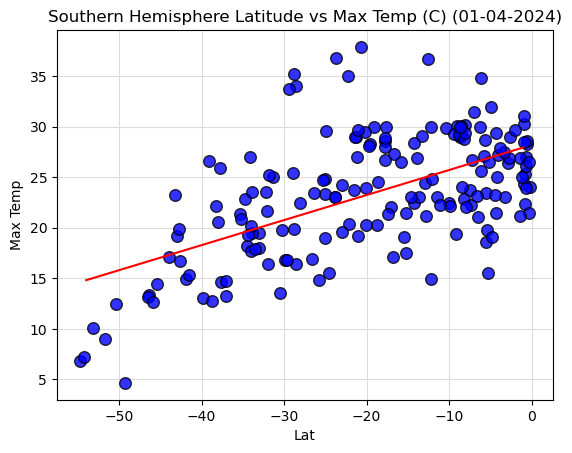

In [16]:
# Linear regression on Southern Hemisphere
southern_regress = latitude_regress(southern_hemi_df, "Lat", "Max Temp")
plt.title(f"Southern Hemisphere Latitude vs Max Temp (C) ({date})")
plt.show()

**Discussion about the linear relationship:** The R-value of the Northern hemisphere is negative while the Southern is positive. Its value in the north is a lot stronger as well.   In the northern hemisphere, as the latititude increases, the stronger the temperature change is and the temperature becomes colder.  In the southern hemisphere, as the latitude increases, the temperature becomes warmer. 

### Humidity vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.39x+60.27
 
The r-squared correlation coefficient for this line is 0.39


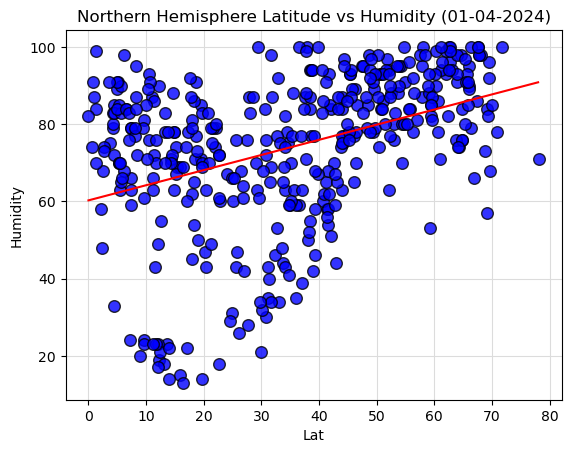

In [17]:
# Northern Hemisphere
northern_regress_humidity = latitude_regress(northern_hemi_df, "Lat", "Humidity")
plt.title(f"Northern Hemisphere Latitude vs Humidity ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.18x+82.15
 
The r-squared correlation coefficient for this line is 0.15


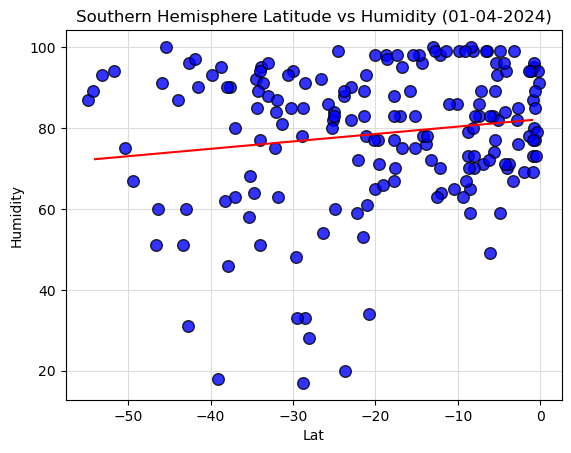

In [18]:
# Southern Hemisphere
southern_regress_humidity = latitude_regress(southern_hemi_df, "Lat", "Humidity")
plt.title(f"Southern Hemisphere Latitude vs Humidity ({date})")
plt.show()

**Discussion about the linear relationship:** In both hemispheres, the r-values are more similar in that they are weak.  Since they are both positive, we can conclude that the humidity will increase as the latitude increases.  However it changes more in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.50x+37.43
 
The r-squared correlation coefficient for this line is 0.24


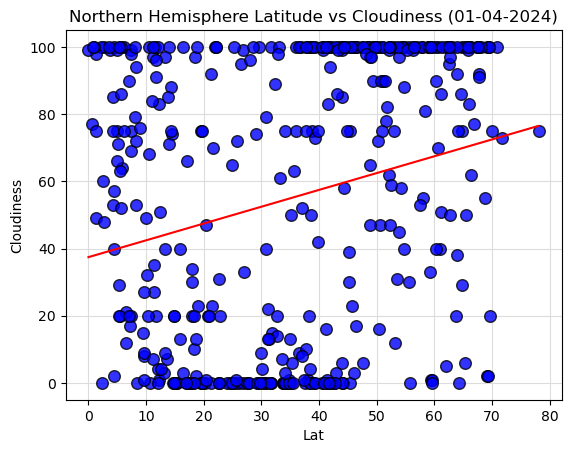

In [19]:
# Northern Hemisphere
northern_regress_clouds = latitude_regress(northern_hemi_df, "Lat", "Cloudiness")
plt.title(f"Northern Hemisphere Latitude vs Cloudiness ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.62x+79.96
 
The r-squared correlation coefficient for this line is 0.24


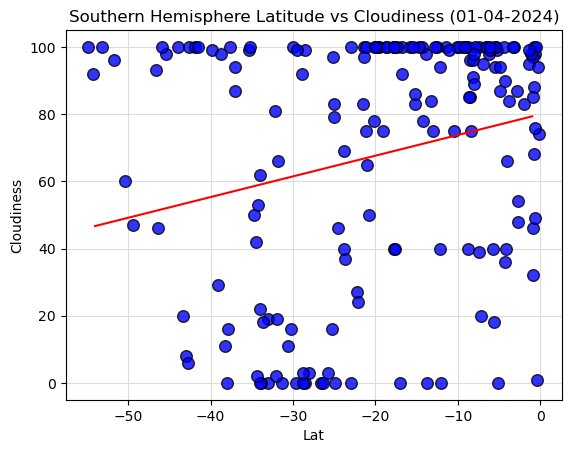

In [20]:
# Southern Hemisphere
southern_regress_clouds = latitude_regress(southern_hemi_df, "Lat", "Cloudiness")
plt.title(f"Southern Hemisphere Latitude vs Cloudiness ({date})")
plt.show()

**Discussion about the linear relationship:** In both hemispheres, the r-values are both weak and positive. This means that as the latitude changes, the more clouds there will be.

### Wind Speed vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.02x+2.96
 
The r-squared correlation coefficient for this line is 0.12


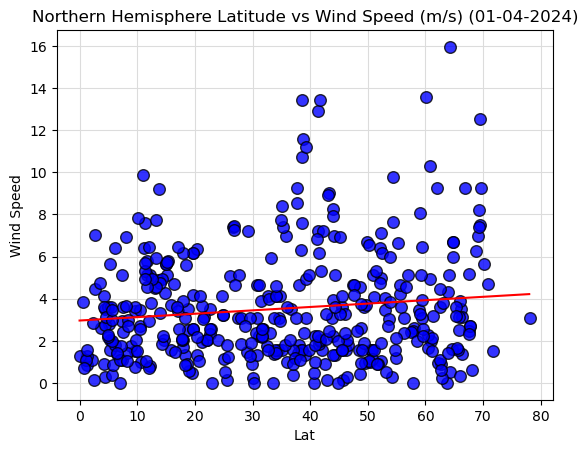

In [21]:
# Northern Hemisphere
northern_regress_wind = latitude_regress(northern_hemi_df, "Lat", "Wind Speed")
plt.title(f"Northern Hemisphere Latitude vs Wind Speed (m/s) ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=-0.04x+2.21
 
The r-squared correlation coefficient for this line is -0.26


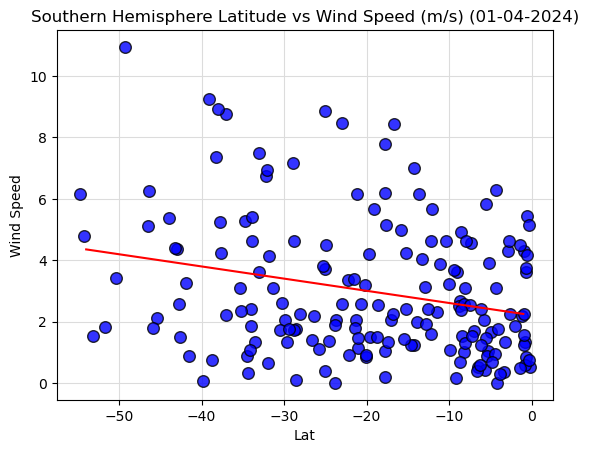

In [22]:
# Southern Hemisphere
southern_regress_wind = latitude_regress(southern_hemi_df, "Lat", "Wind Speed")
plt.title(f"Southern Hemisphere Latitude vs Wind Speed (m/s) ({date})")
plt.show()

**Discussion about the linear relationship:** Both hemispheres r-values are weak.  The linear relationship here indicates that there is not much change in the amount of wind speed as the latitudes increase.  The northern hemisphere has a positive value indicating slightly more windier conditions and the southern hemisphere has a negative value indicicating there is a slightly less windier condition.